# Set-Up Environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# Load in the Data Set

In [2]:
data = pd.read_csv('2018 Jan BOIBOV.csv')
print(data.shape)
data.head()

(2496207, 3)


,registered_user_id,boi,bov
0,a1be47d8-e230-44eb-92ca-bb5f805d8ebd,1,4
1,c88ae5c4-0d61-4482-b175-bcf568319935,3,13
2,90cd54cb-6a3f-4239-826b-0bc499269300,2,76
3,1dd20a21-1e2e-4332-bb18-5e4e342430f1,1,1
4,9b3ce978-f011-48dc-8762-154a5c4a9c0f,3,26


# Plot the Data

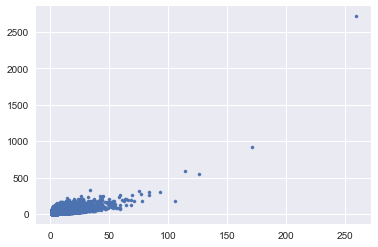

In [3]:
plt.scatter(data['boi'],data['bov'], s=10)

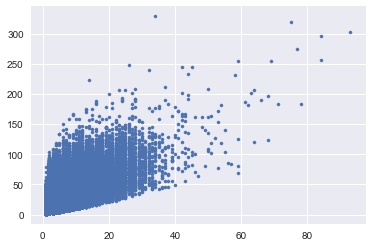

In [4]:
data = data.loc[data.boi<100, ['boi', 'bov']]
plt.scatter(data['boi'],data['bov'],s=10)

In [5]:
isinstance(data['bov'], int)

False

In [6]:
data['bov'] = pd.to_numeric(data['bov'])
data['boi'] = pd.to_numeric(data['boi'])

([array([ 1342404.,   547502.,   489783.,   116513.]),
  array([ 863358.,  408205.,  841596.,  383043.])],
 array([   0.,   52.,  104.,  156.,  208.]),
 <a list of 2 Lists of Patches objects>)

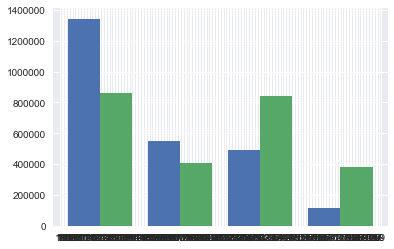

In [7]:
plt.hist(data, bins=4)

([array([ 1342404.,        0.,        0.,        0.,        0.,        0.,
                0.,        0.]),
  array([  8.63326000e+05,   0.00000000e+00,   3.20000000e+01,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00])],
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40]),
 <a list of 2 Lists of Patches objects>)

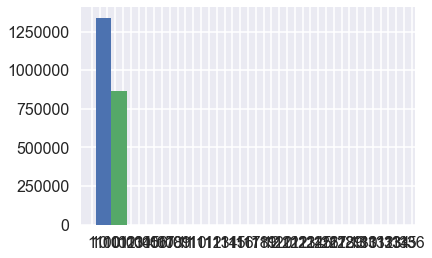

In [21]:
plt.hist(data, bins=[0,5,10,15,20,25,30,35,40])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data.loc[:,['registered_user_id','boi','bov']], test_size=0.9, random_state=42)

In [9]:
data['registered_user_id'].nunique()

KeyError: 'registered_user_id'

In [ ]:
X_train['registered_user_id'].nunique()

In [10]:
X_train.head()

,registered_user_id,boi,bov
2418197,NaN,1,1
2207101,NaN,1,3
776087,NaN,1,1
468197,NaN,1,2
1629683,NaN,1,4


In [11]:
df = X_train.loc[:, ['boi', 'bov']]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(df, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(df)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(df.T[0], df.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [13]:
import hdbscan
plot_clusters(df, hdbscan.HDBSCAN, (), {'min_cluster_size':20})

KeyError: 0

In [ ]:
plot_clusters(df, cluster.KMeans, (), {'n_clusters':4})

In [1]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import hdbscan

def clustered_scatterplot(data, min_cluster_size):
    
    data = data.dropna()
    
    as_array = data.values 
    scaler = StandardScaler()
    as_array_scaled = scaler.fit_transform(as_array)
    back_to_pandas = pd.DataFrame(as_array_scaled)

    labels = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size).fit_predict(back_to_pandas)
    
    data = data.assign(cluster = labels.tolist())

    return sns.lmplot(x=data.columns[0], y=data.columns[1], data=data, fit_reg=False, hue='cluster', legend=False, scatter_kws={'alpha':0.4, 's':20}, size = 8)

In [6]:
data = pd.read_csv('2018 Jan BOIBOV.csv')
data = data.loc[data.boi<100, ['boi', 'bov']]
sample = data.sample(10000)

In [3]:
sample.head()

,boi,bov
1552055,1,3
1353368,3,6
1251,6,38
408204,4,6
790655,2,3


C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


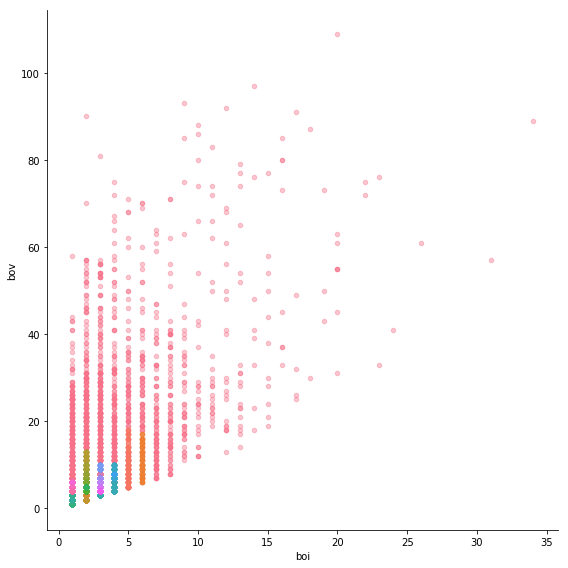

In [10]:
%matplotlib inline
_=clustered_scatterplot(sample,50)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

data = pd.read_csv('2018 Jan BOIBOV.csv')
##data = data.loc[data.boi<100, ['boi', 'bov']]
data['boi'].mean()

2.143779342017709

In [9]:
data['boi'].mode()

0    1
dtype: int64

In [11]:
data['bov'].std()

10.323035570290305

In [15]:
len(data[(data['bov']<6.43) & (data['boi']>2.14)])

202131

In [16]:
len(data['boi'])

2496207

In [20]:
data['bov'].quantile(0.25)

1.0